About DataSet:
   This dataset contains a list of video games with sales greater than 100,000 copies.
       
   It was generated by a scrap of Vgchartz.com

Field Include: - 
  Rank --> Ranking of overall sales,

  Name --> The games names,

  Platform --> Platform of the games release,

  Year --> Year of the game release,

  Genre --> Genre of the games,

  Publisher --> publisher of games,

  NA_Sales --> Sales in North America (in millions),

  EU_Sales --> Sales in Europe(in millions),

  Other_Sales --> Sales in Other Country(in millions)

  Global_Sales --> Sales in Every Country(in millions)

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Find Null Values
missing_values=df.isnull().sum()
#Print the number of missing values for each column
print(missing_values)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [4]:
#Filling Null Values

In [5]:
#fill missing values in the "Year" Column with the median value
median=df['Year'].median()
df["Year"].fillna(median,inplace=True)

In [6]:
#Check if there are any missing values in the "Year" Column
missing_values=df["Year"].isnull().sum()
print("Number of missing values in 'Year' Column:",missing_values)

Number of missing values in 'Year' Column: 0


In [7]:
#Fill missing values in the "Publisher" Column 
df.dropna(subset=["Publisher"],inplace=True)
#Check if there are any missing values left in the 'Publisher' Column
missing_values=df["Publisher"].isnull().sum()
print("Number of missing values in 'Publisher' column:",missing_values)

Number of missing values in 'Publisher' column: 0


In [8]:
#Check for Duplicate Rows
duplicate=df.duplicated().sum()
print("Number of Duplicate Rows:",duplicate)

Number of Duplicate Rows: 0


In [9]:
#Use the datatype attribute to print the datatype of each column
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [10]:
#Changing datatype from float to Integer

In [11]:
df["Year"]=df["Year"].astype("int")
df["NA_Sales"]=df["NA_Sales"].astype("int")
df["EU_Sales"]=df["EU_Sales"].astype("int")
df["JP_Sales"]=df["JP_Sales"].astype("int")
df["Other_Sales"]=df["Other_Sales"].astype("int")
df["Global_Sales"]=df["Global_Sales"].astype("int")

In [12]:
print(df.dtypes)

Rank             int64
Name            object
Platform        object
Year             int32
Genre           object
Publisher       object
NA_Sales         int32
EU_Sales         int32
JP_Sales         int32
Other_Sales      int32
Global_Sales     int32
dtype: object


# EXPLORATORY ANALYSIS & VISUALIZATION

In [13]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,8294.197642,2006.414510,0.106530,0.050544,0.024547,0.007376,0.294740
std,4790.703200,5.788794,0.753423,0.447210,0.251248,0.146940,1.504897
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4143.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8292.500000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12440.250000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16600.000000,2020.000000,41.000000,29.000000,10.000000,10.000000,82.000000


#RELATIONSHIP BETWEEN YEAR & GLOBAL SALES(VISUALIZATION)

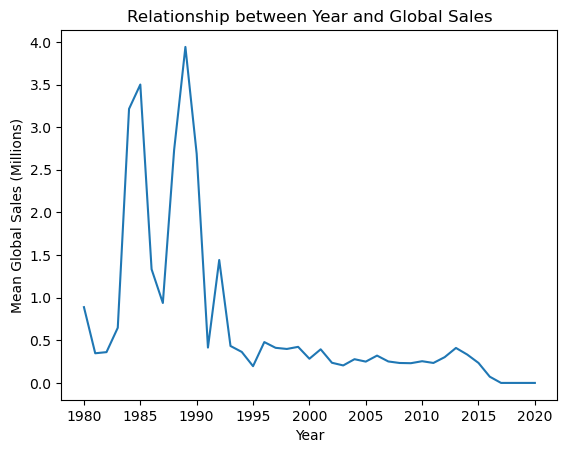

In [14]:
# Convert the 'Global Sales' column to a numeric data type
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

# Group the data by year and calculate the mean Global Sales for each year
grouped=df.groupby('Year').mean(numeric_only=True)
plt.plot(grouped.index, grouped ['Global_Sales'])
# Plot the year on X-axis and the mean Global Sales on the Y-axis
plt.xlabel('Year')
plt.ylabel('Mean Global Sales (Millions)')
plt.title("Relationship between Year and Global Sales")
plt.show()

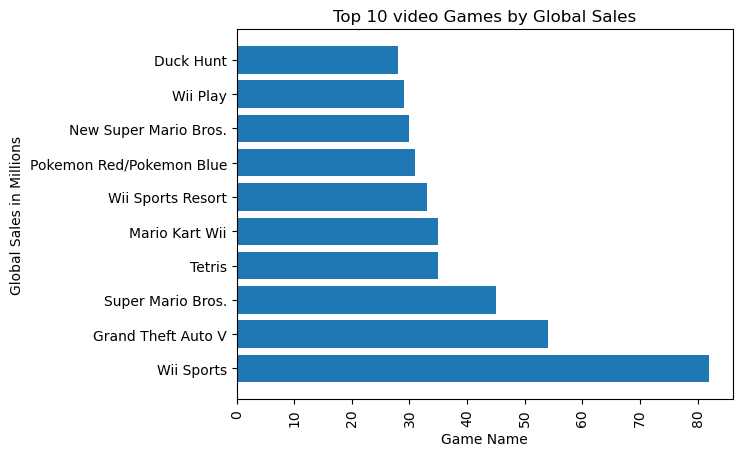

In [15]:
# Group the data by Name and Calculate the sum of the Global Sales Column
grouped=df.groupby("Name").sum().reset_index()
#Sort the data in Descending order by Global_Sales
grouped=grouped.sort_values(by="Global_Sales",ascending=False)
#Plot a bar chart of top 10 games
top_10=grouped[:10]
plt.barh(top_10["Name"],top_10["Global_Sales"])
plt.xlabel("Game Name")
plt.ylabel("Global Sales in Millions")
plt.title("Top 10 video Games by Global Sales")
plt.xticks(rotation=90)
plt.show()

# THANKYOU